<div style="font-size:32px; font-weight:bold; color:#FABF8F; font-family:Arial;">
  📊 Lesson 3 : Analyzing the Results   
</div>


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

 <h2 style="color:#388E3C">🌱 Step 1: Load Saved Outputs</h2>  

In [3]:
# Read actual labels from test set
Y_test = pd.read_csv('Y_test.csv')  # True exam outcomes (pass/fail)

# Read model predictions
Y_pred = pd.read_csv('Y_pred.csv')  # Predicted labels from model

# Reload original dataset for reference
Data = pd.read_csv('student_exam.csv')  # Full feature set with 'G3' target

# Reload class labels used during training
modelclasses = pd.read_csv('modelclasses_.csv')  # Classes (e.g., Pass, Fail)

 <h2 style="color:#1565C0">📊 Step 2: Confusion Matrix Visualization</h2>

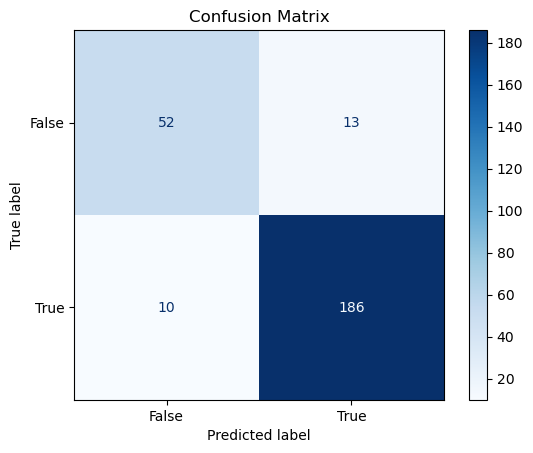

Confusion Matrix:
 [[ 52  13]
 [ 10 186]]


In [4]:
# Import confusion matrix tools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix comparing true vs predicted labels
cm = confusion_matrix(Y_test['G3'], Y_pred['0'])

# Create visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelclasses['0'])
disp.plot(cmap=plt.cm.Blues)  # Use blue color map for better visibility
plt.title('Confusion Matrix')
plt.show()

# Optional: print raw numeric matrix
print("Confusion Matrix:\n", cm)

<h3 style="color:#1565C0">📊 What You Learn from the Confusion Matrix</h3>

A **confusion matrix** breaks down the performance of a classification model into four components:

| Term              | Meaning                                                                |
|------------------|-------------------------------------------------------------------------|
| ✅ True Positive (TP) | Correctly predicted pass                                               |
| ✅ True Negative (TN) | Correctly predicted fail                                               |
| ❌ False Positive (FP)| Predicted pass, but the student actually failed                        |
| ❌ False Negative (FN)| Predicted fail, but the student actually passed                        |

### 🌟 Key Insights:
- **Error Diagnosis**: See where the model struggles (FP vs FN).
- **Model Quality**: Use metrics like accuracy, precision, recall.
- **Bias Detection**: Does the model favor a certain outcome (e.g., predicting "pass" too often)?
- **Subgroup Fairness**: Use breakdowns by gender, school, etc., to check for unfair performance.

---


 <h2 style="color:#6A1B9A">🧪 Step 3: Preprocess Features for MI Analysis</h2>

In [5]:
# Separate independent features and target
X = Data.drop("G3", axis=1)  # All columns except final grade
y = Data["G3"]               # Target variable

# Convert categorical (object) columns to numeric codes
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()  # Encode with integer labels

# Identify which columns are discrete
discrete_features = X.dtypes == int


 <h2 style="color:#C62828">📈 Step 4: Compute MI Scores</h2>

In [6]:
# Import MI regression function
from sklearn.feature_selection import mutual_info_regression

# Create helper function to compute scores
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)  # Compute MI
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)  # Label results
    mi_scores = mi_scores.sort_values(ascending=False)  # Sort features from most to least useful
    return mi_scores

# Calculate MI scores
mi_scores = make_mi_scores(X, y, discrete_features)

# Preview every third score (as sample)
mi_scores[::3]


G2           1.240918
Mjob         0.095066
age          0.064463
school       0.021555
famsize      0.018939
internet     0.015456
Medu         0.011918
Walc         0.005089
studytime    0.000185
Pstatus      0.000000
Fedu         0.000000
Name: MI Scores, dtype: float64

 <h2 style="color:#AD1457">🖼️ Step 5: Plot Feature Importance</h2> 

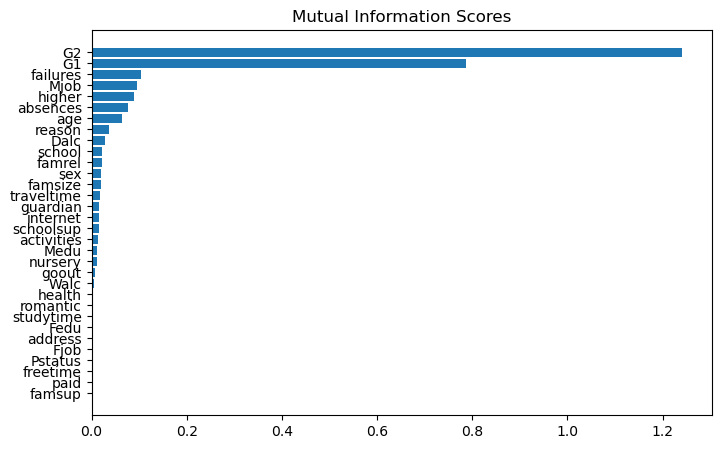

In [7]:
# Define plotting function
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)  # Plot smallest to largest for horizontal bars
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)        # Horizontal bar chart
    plt.yticks(width, ticks)       # Feature names on Y-axis
    plt.title("Mutual Information Scores")  # Title for context

# Create visual
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

<h3 style="color:#C62828">🧠 What You Learn from Mutual Information (MI) Scores</h3>

**Mutual Information** tells us how much knowing a feature helps us predict the target outcome.

### 🧪 Example Output:
| Feature     | MI Score | Interpretation                                      |
|-------------|----------|-----------------------------------------------------|
| StudyTime   | High     | Students who study more are more likely to pass     |
| Absences    | Medium   | Skipping class can affect grades                    |
| Mother's Job| Low      | Weak signal for predicting exam results             |

### 🌟 Key Insights:
- **Feature Importance**: Learn which features matter most.
- **Model Interpretation**: Helps explain what the model focuses on.
- **Simplification**: Drop weak features to improve speed and clarity.
- **Ethical Checks**: Identify if personal/demographic features drive predictions.

---

 <h3 style="color:#2E7D32">🔍 Why These Tools Matter (Together)</h3>

Using both Confusion Matrix and MI Scores helps us:

✅ Understand what the model predicts (and where it fails)  
✅ Discover which features drive those predictions  
✅ Make better teaching decisions for students  
✅ Create fairer, simpler, and more trustworthy models  
✅ Encourage critical thinking around machine learning in education  

---

 <h2 style="color:#00695C">🧠 What You Should Learn</h2>

✅ Load saved predictions for post-training evaluation  
✅ Understand and visualize classification results using a confusion matrix  
✅ Encode categorical features for analysis  
✅ Use Mutual Information to rank feature relevance  
✅ Interpret and visualize feature importance scores  
✅ Connect model decisions to real-world student data


 <h2 style="color:#00695C">🎯 Challenges For You : </h2>

🧩 Challenge 1: Precision & Recall  
Use `precision_score()` and `recall_score()` to evaluate the quality of predictions.

📐 Challenge 2: Confusion Matrix Breakdown  
Extract TP, FP, FN, TN manually and explain what each means for student outcomes.

📉 Challenge 3: Compare MI to Correlation  
Create a correlation heatmap and compare it with MI scores. Do the top features match?

🛠️ Challenge 4: Feature Engineering  
Add a new column: `avg_grade = (G1 + G2) / 2`. Recompute MI. Does it score higher?

📊 Challenge 5: Explain Your Model  
Pick the top 3 features. Write a short paragraph explaining why they might influence exam success.

🎓 Bonus Challenge: Detect Bias  
Check if the model performs equally well for students in different schools or genders. Try subgroup evaluation!
